In [3]:
#Libraries for reading data and visualising the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Libraries for data pre processing and imputing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

#Libraries for output analysis
from sklearn import metrics

#Libraries for dimetionality reduction and feauture selection
from sklearn.decomposition import PCA

#Libraries for test train split, cross_validation and hypertying
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_validate

#Importing Libraries for Supervised Learning

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from xgboost import XGBRegressor

#other required
import math
from scipy.stats import norm,skew
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


### Step 1: Import the data

In [4]:
def data_analysis(data):
    print(data.shape)
    print(data.head())
    print(data.info())
    print(data.isnull().sum())
    print(data.describe().transpose())


In [5]:
# train_Data=pd.read_csv('train.csv')
# test_Data=pd.read_csv('test.csv')
data=pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

In [6]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [7]:
data_analysis(data)

(425, 11)
   Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0     

### Observations:
* There are 425 rows and 11 columns in the total data set
* All of the columns are read as categorical values
* There are no null entires in the data set.
* Unnamed: 0 Column can be removed 
* Column names can be renamed for proper identification

### Step 2: Data Cleansing

In [8]:
### Renaming Genrs and Data columns to Gender and Date
data=data.rename(columns={'Data':'Date','Genre':'Gender'})

In [9]:
### Removing unwanted columns
data=data.drop('Unnamed: 0',axis=1)

In [10]:
## Checking for duplicates data
data.duplicated().value_counts()

False    418
True       7
dtype: int64

In [11]:
duplicate_data=data.duplicated()

In [12]:
data[duplicate_data]

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [13]:
data=data.drop_duplicates()

In [14]:
data.shape

(418, 10)

In [15]:
## Checking for null values
data.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [16]:
data_view_columns=[ 'Date','Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee or Third Party',
       'Critical Risk']
for value in data_view_columns:
    print(f'Viewing the unique values of {value} \n {data[value].value_counts()} \n\n')

Viewing the unique values of Date 
 2017-02-08 00:00:00    6
2016-06-16 00:00:00    5
2016-02-15 00:00:00    4
2016-10-03 00:00:00    4
2016-06-08 00:00:00    4
                      ..
2017-06-18 00:00:00    1
2017-07-06 00:00:00    1
2016-10-11 00:00:00    1
2017-01-06 00:00:00    1
2016-04-07 00:00:00    1
Name: Date, Length: 287, dtype: int64 


Viewing the unique values of Countries 
 Country_01    248
Country_02    129
Country_03     41
Name: Countries, dtype: int64 


Viewing the unique values of Local 
 Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_11     2
Local_09     2
Name: Local, dtype: int64 


Viewing the unique values of Industry Sector 
 Mining    237
Metals    134
Others     47
Name: Industry Sector, dtype: int64 


Viewing the unique values of Accident Level 
 I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64 


Viewing

#### Observations:
* We have renamed the Data and Gener columns to date and gender
* Dropped Unnamed: 0 column as its representing indexe values
* 7 Duplicate entries found and removed from data set
* Now there are 418 rows and 10 columns
* No Null values present in all the columns

#### Data set  Insights 
* 287 different days incidets are captures in given data set
* 3 different countries incident details are present
* 12 different cities incidents information is captured in data sets
* Incident details of three industry types is present
* 5 different accident levels are rated
* 6 different potential accident levels are categorised on accident
* Both males are females are working in the industry
* There are many different types of critical risks types in the given data set 


### Step 3: Data Pre Processing and EDA 

In [17]:
## Changing the datatype of the date column
data['Date']=pd.to_datetime(data['Date'])

In [18]:
def dateColumsExpansion():
    data['Year']=data['Date'].dt.year
    data['month']=data['Date'].dt.month
    data['hour']=data['Date'].dt.hour
    data['day']=data['Date'].dt.day
    data['minutes']=data['Date'].dt.minute
    data['weekday']=data['Date'].dt.day_name()

In [19]:
data.dtypes.value_counts()

object            9
datetime64[ns]    1
dtype: int64

In [20]:
### Creating more columns based on the given time duation of the incident
dateColumsExpansion()

In [21]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,month,hour,day,minutes,weekday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,0,1,0,Friday
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,0,2,0,Saturday
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,0,6,0,Wednesday
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,0,8,0,Friday
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,0,10,0,Sunday


In [22]:
date_columns=['Year','month','day','hour','minutes','weekday']

In [23]:
for value in date_columns:
    print(f'Viewing the unique values of {value} \n {data[value].value_counts()} \n\n')

Viewing the unique values of Year 
 2016    283
2017    135
Name: Year, dtype: int64 


Viewing the unique values of month 
 2     61
6     51
4     51
3     50
5     40
1     39
9     24
7     24
12    23
10    21
8     21
11    13
Name: month, dtype: int64 


Viewing the unique values of day 
 8     25
4     22
16    19
11    18
22    17
24    16
23    16
17    15
25    15
13    15
18    15
5     14
15    14
30    14
1     14
10    13
6     13
2     13
14    12
9     12
29    12
19    11
20    11
12    11
7     11
3     10
21     9
26     9
27     9
31     7
28     6
Name: day, dtype: int64 


Viewing the unique values of hour 
 0    418
Name: hour, dtype: int64 


Viewing the unique values of minutes 
 0    418
Name: minutes, dtype: int64 


Viewing the unique values of weekday 
 Thursday     76
Tuesday      69
Wednesday    62
Friday       61
Saturday     56
Monday       53
Sunday       41
Name: weekday, dtype: int64 




In [24]:
data=data.drop(['minutes','hour'], axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  month                     418 non-null    int64         
 12  day                   

#### Observations
* data type of the date column is changed to datetime to do more deeper analysis
* Based on the date information we are extracting  year, month, date, weekday, hour, minutes
* Hour and Minutes in date entry is same hence dropping
* Captured incidents are happened during 2016 and 2017 years
* We can do EDA for more understanding of data and visulization

### Univeriate analysis

In [33]:
def countplotdistributionwise(columnData,totalData):
    g=sns.countplot(columnData)
    #print(g.patches)
    for k in g.patches:
        #print(k.get_height(),k.get_x(),k.get_width())
        g.annotate(str(np.round(k.get_height()/len(totalData)*(100), decimals=2)), (k.get_x()+k.get_width()/2,k.get_height()), ha='center', va='center',xytext=(0,5), textcoords='offset points')
    

Text(0.5, 1.0, 'Accident Level Distibutions')

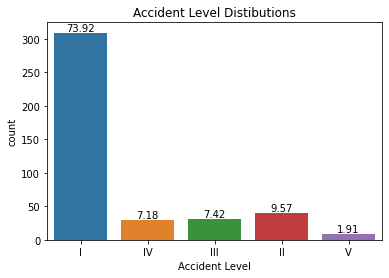

In [27]:
countplotdistributionwise(data['Accident Level'],data)
plt.title('Accident Level Distibutions')

* 73% of the accidents are level 1 accidents 
* 1.91% of accidents are of level 5 which of concern


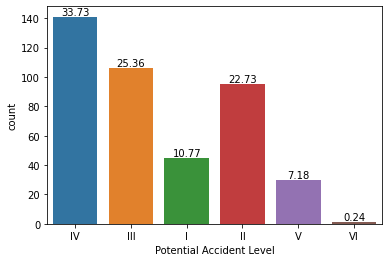

In [28]:
countplotdistributionwise(data['Potential Accident Level'],data)

* 33.7 % of accidents are  level 4 potential accidents
* 25 % are level 3 potential accidents
* 22% are level 2 potential accidents
* 0.24 % are level 6 potential accidents which is of more concern


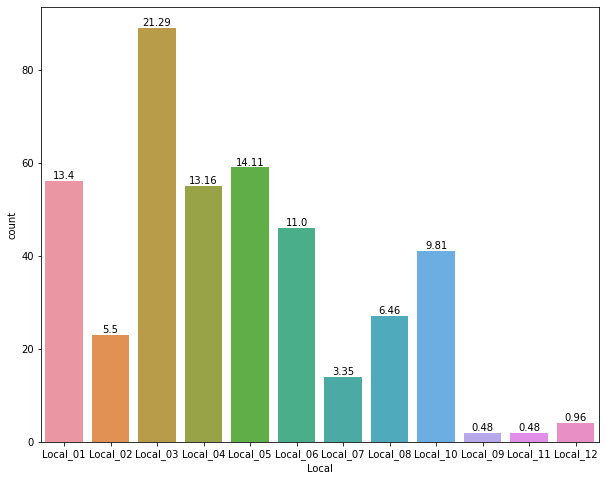

In [34]:
plt.figure(figsize=(10,8))
countplotdistributionwise(data['Local'],data)

* Accidents are happened in 12 different locals
* 21.29 % of accidents happened in local 3
* 14% accidents happened in Local 5
* 13 % accidents happened in local 4 
* 13% accidents happened in local 1
* 0.48% accidents happened in local 9 and local 11 each

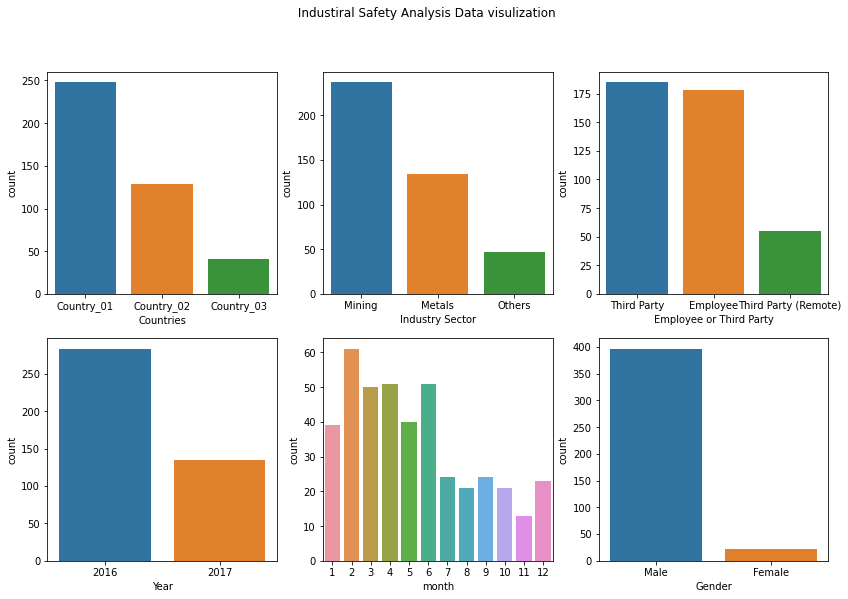

In [65]:
fig,ax=plt.subplots(2,3, figsize=(14,9))
fig.suptitle(' Industiral Safety Analysis Data visulization')

# axis=[[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]
# columnsto_view=['Countries','Industry Sector','Employee or Third Party','Year','month','Gender']

sns.countplot(ax=ax[0,0], x=data['Countries'])
sns.countplot(ax=ax[0,1], x=data['Industry Sector'])
sns.countplot(ax=ax[0,2], x=data['Employee or Third Party'])
sns.countplot(ax=ax[1,0], x=data['Year'])
sns.countplot(ax=ax[1,1], x=data['month'])
sns.countplot(ax=ax[1,2], x=data['Gender'])
plt.show()

# for i in range(len(columnsto_view)):
#     #ax=axis[i]
# #     columnname=columnsto_view[i]
#     print(i, axis[i],columnsto_view[i])
#     sns.countplot(ax=ax[axis[i]],x=data[columnsto_view[i]]).annotate(str(np.round(k.get_height()/len(totalData)*(100), decimals=2)), (k.get_x()+k.get_width()/2,k.get_height()), ha='center', va='center',xytext=(0,5), textcoords='offset points')
# #     for k in g.patches:
# #         #print(k.get_height(),k.get_x(),k.get_width())
# #         g.plot.annotate(str(np.round(k.get_height()/len(totalData)*(100), decimals=2)), (k.get_x()+k.get_width()/2,k.get_height()), ha='center', va='center',xytext=(0,5), textcoords='offset points')
# # #     plt.show()
    
# # plt.show()

### Observations:
* Most accidents reported in Country 1 follwed by country 2 and 3
* Most fo the industries are of Mining follwed by Metals and others
* Most of the people involved in accident are of third party and Employes follweed by remote third party
* 2/3 of the accidents reported in 2016 
* Most of the incidents seen in feb to jun months
* Few Female emplyess are involved in incidents reported

<AxesSubplot:xlabel='month', ylabel='count'>

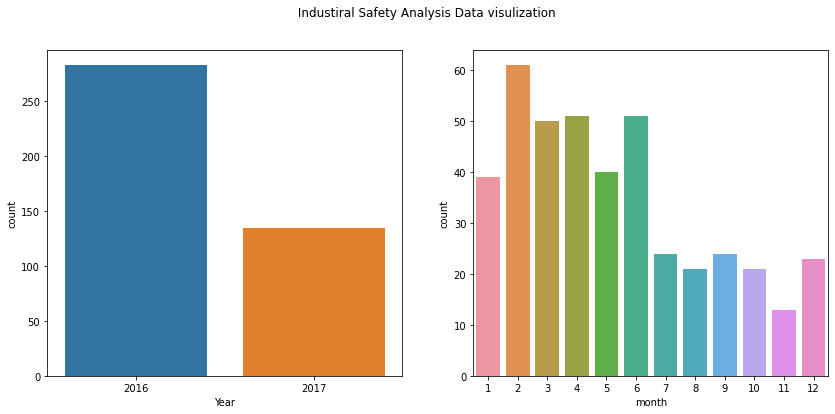

In [75]:
fig,ax=plt.subplots(1,2, figsize=(14,6))
fig.suptitle(' Industiral Safety Analysis Data visulization')

sns.countplot(ax=ax[0], x=data['Year'])
sns.countplot(ax=ax[1], x=data['month'])
# sns.countplot(ax=ax[1,0], x=data['day'])
# sns.countplot(ax=ax[1,2], x=data[''])

### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

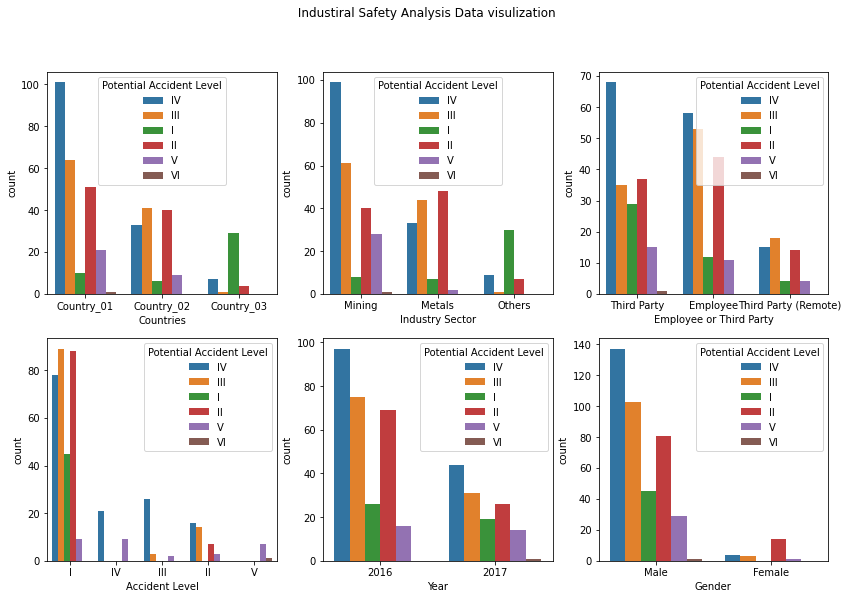

In [59]:
fig,ax=plt.subplots(2,3, figsize=(14,9))
fig.suptitle(' Industiral Safety Analysis Data visulization')

sns.countplot(ax=ax[0,0], x=data['Countries'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[0,1], x=data['Industry Sector'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[0,2], x=data['Employee or Third Party'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[1,0], x=data['Accident Level'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[1,1], x=data['Year'],hue=data['Potential Accident Level'])
sns.countplot(ax=ax[1,2], x=data['Gender'],hue=data['Potential Accident Level'])


<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

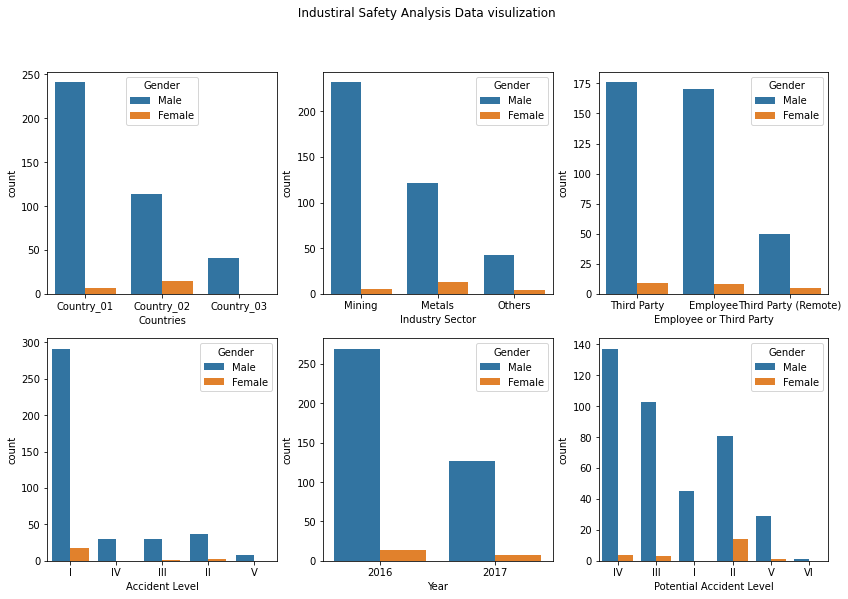

In [115]:
fig,ax=plt.subplots(2,3, figsize=(14,9))
fig.suptitle(' Industiral Safety Analysis Data visulization')

sns.countplot(ax=ax[0,0], x=data['Countries'],hue=data['Gender'])
sns.countplot(ax=ax[0,1], x=data['Industry Sector'],hue=data['Gender'])
sns.countplot(ax=ax[0,2], x=data['Employee or Third Party'],hue=data['Gender'])
sns.countplot(ax=ax[1,0], x=data['Accident Level'],hue=data['Gender'])
sns.countplot(ax=ax[1,1], x=data['Year'],hue=data['Gender'])
sns.countplot(ax=ax[1,2], x=data['Potential Accident Level'],hue=data['Gender'])

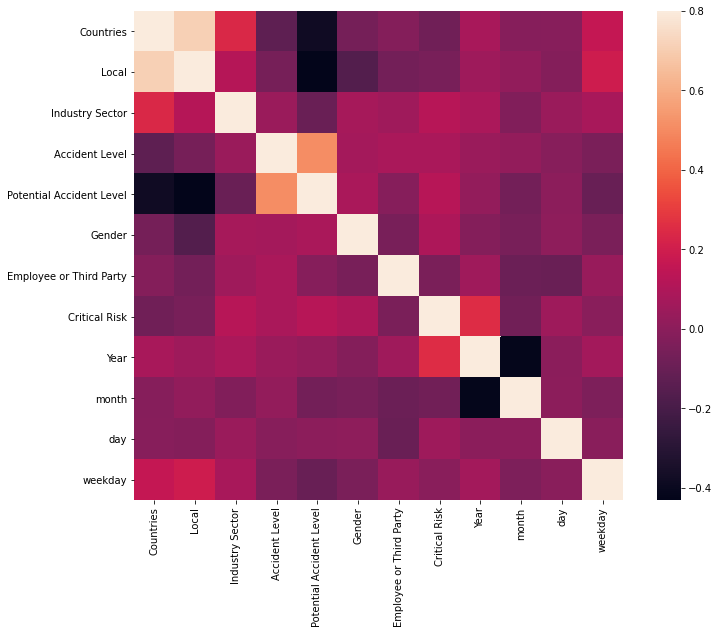

In [124]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(),vmax=0.8,square=True,);

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  month                     418 non-null    int64         
 12  day                   

In [121]:
def labelencodingData():
#     encoder_countries=LabelEncoder().fit(data['Countries'])
#     encoder_Local=LabelEncoder().fit(data['Local'])
#     encoder_Industry=LabelEncoder().fit(data['Industry Sector'])
#     encoder_AccidentLevel=LabelEncoder().fit(data['Accident Level'])
#     encoder_Potential=LabelEncoder().fit(data['Genre'])
#     encoder_Employee=LabelEncoder().fit(data[])
    data['Countries']=LabelEncoder().fit_transform(data['Countries'])
    data['Local']=LabelEncoder().fit_transform(data['Local'])
    data['Industry Sector']=LabelEncoder().fit_transform(data['Industry Sector'])
    data['Accident Level']=LabelEncoder().fit_transform(data['Accident Level'])
    data['Potential Accident Level']=LabelEncoder().fit_transform(data['Potential Accident Level'])
    data['Employee or Third Party']=LabelEncoder().fit_transform(data['Employee or Third Party'])
    data['Critical Risk']=LabelEncoder().fit_transform(data['Critical Risk'])
    data['Gender']=LabelEncoder().fit_transform(data['Gender'])
    data['weekday']=LabelEncoder().fit_transform(data['weekday'])
    
    

In [122]:
labelencodingData()

In [123]:
data.dtypes.value_counts()

int64             12
object             1
datetime64[ns]     1
dtype: int64

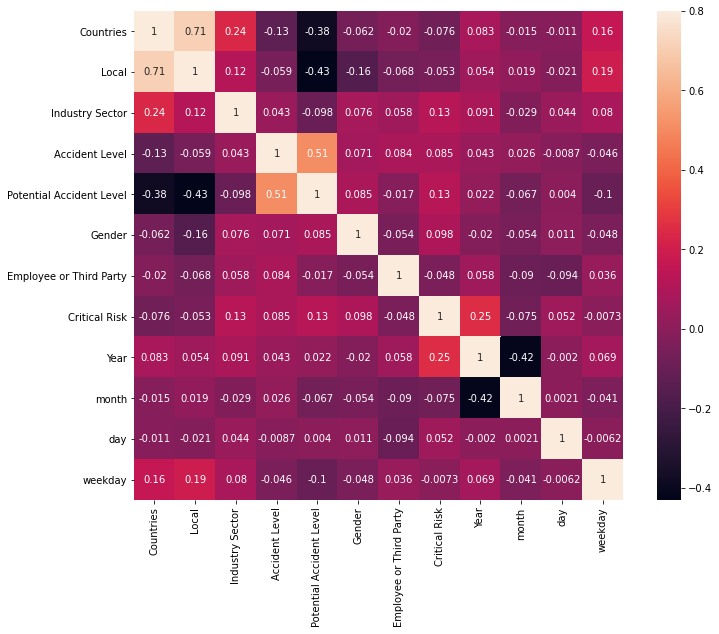

In [126]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(),vmax=0.8,square=True, annot=True);

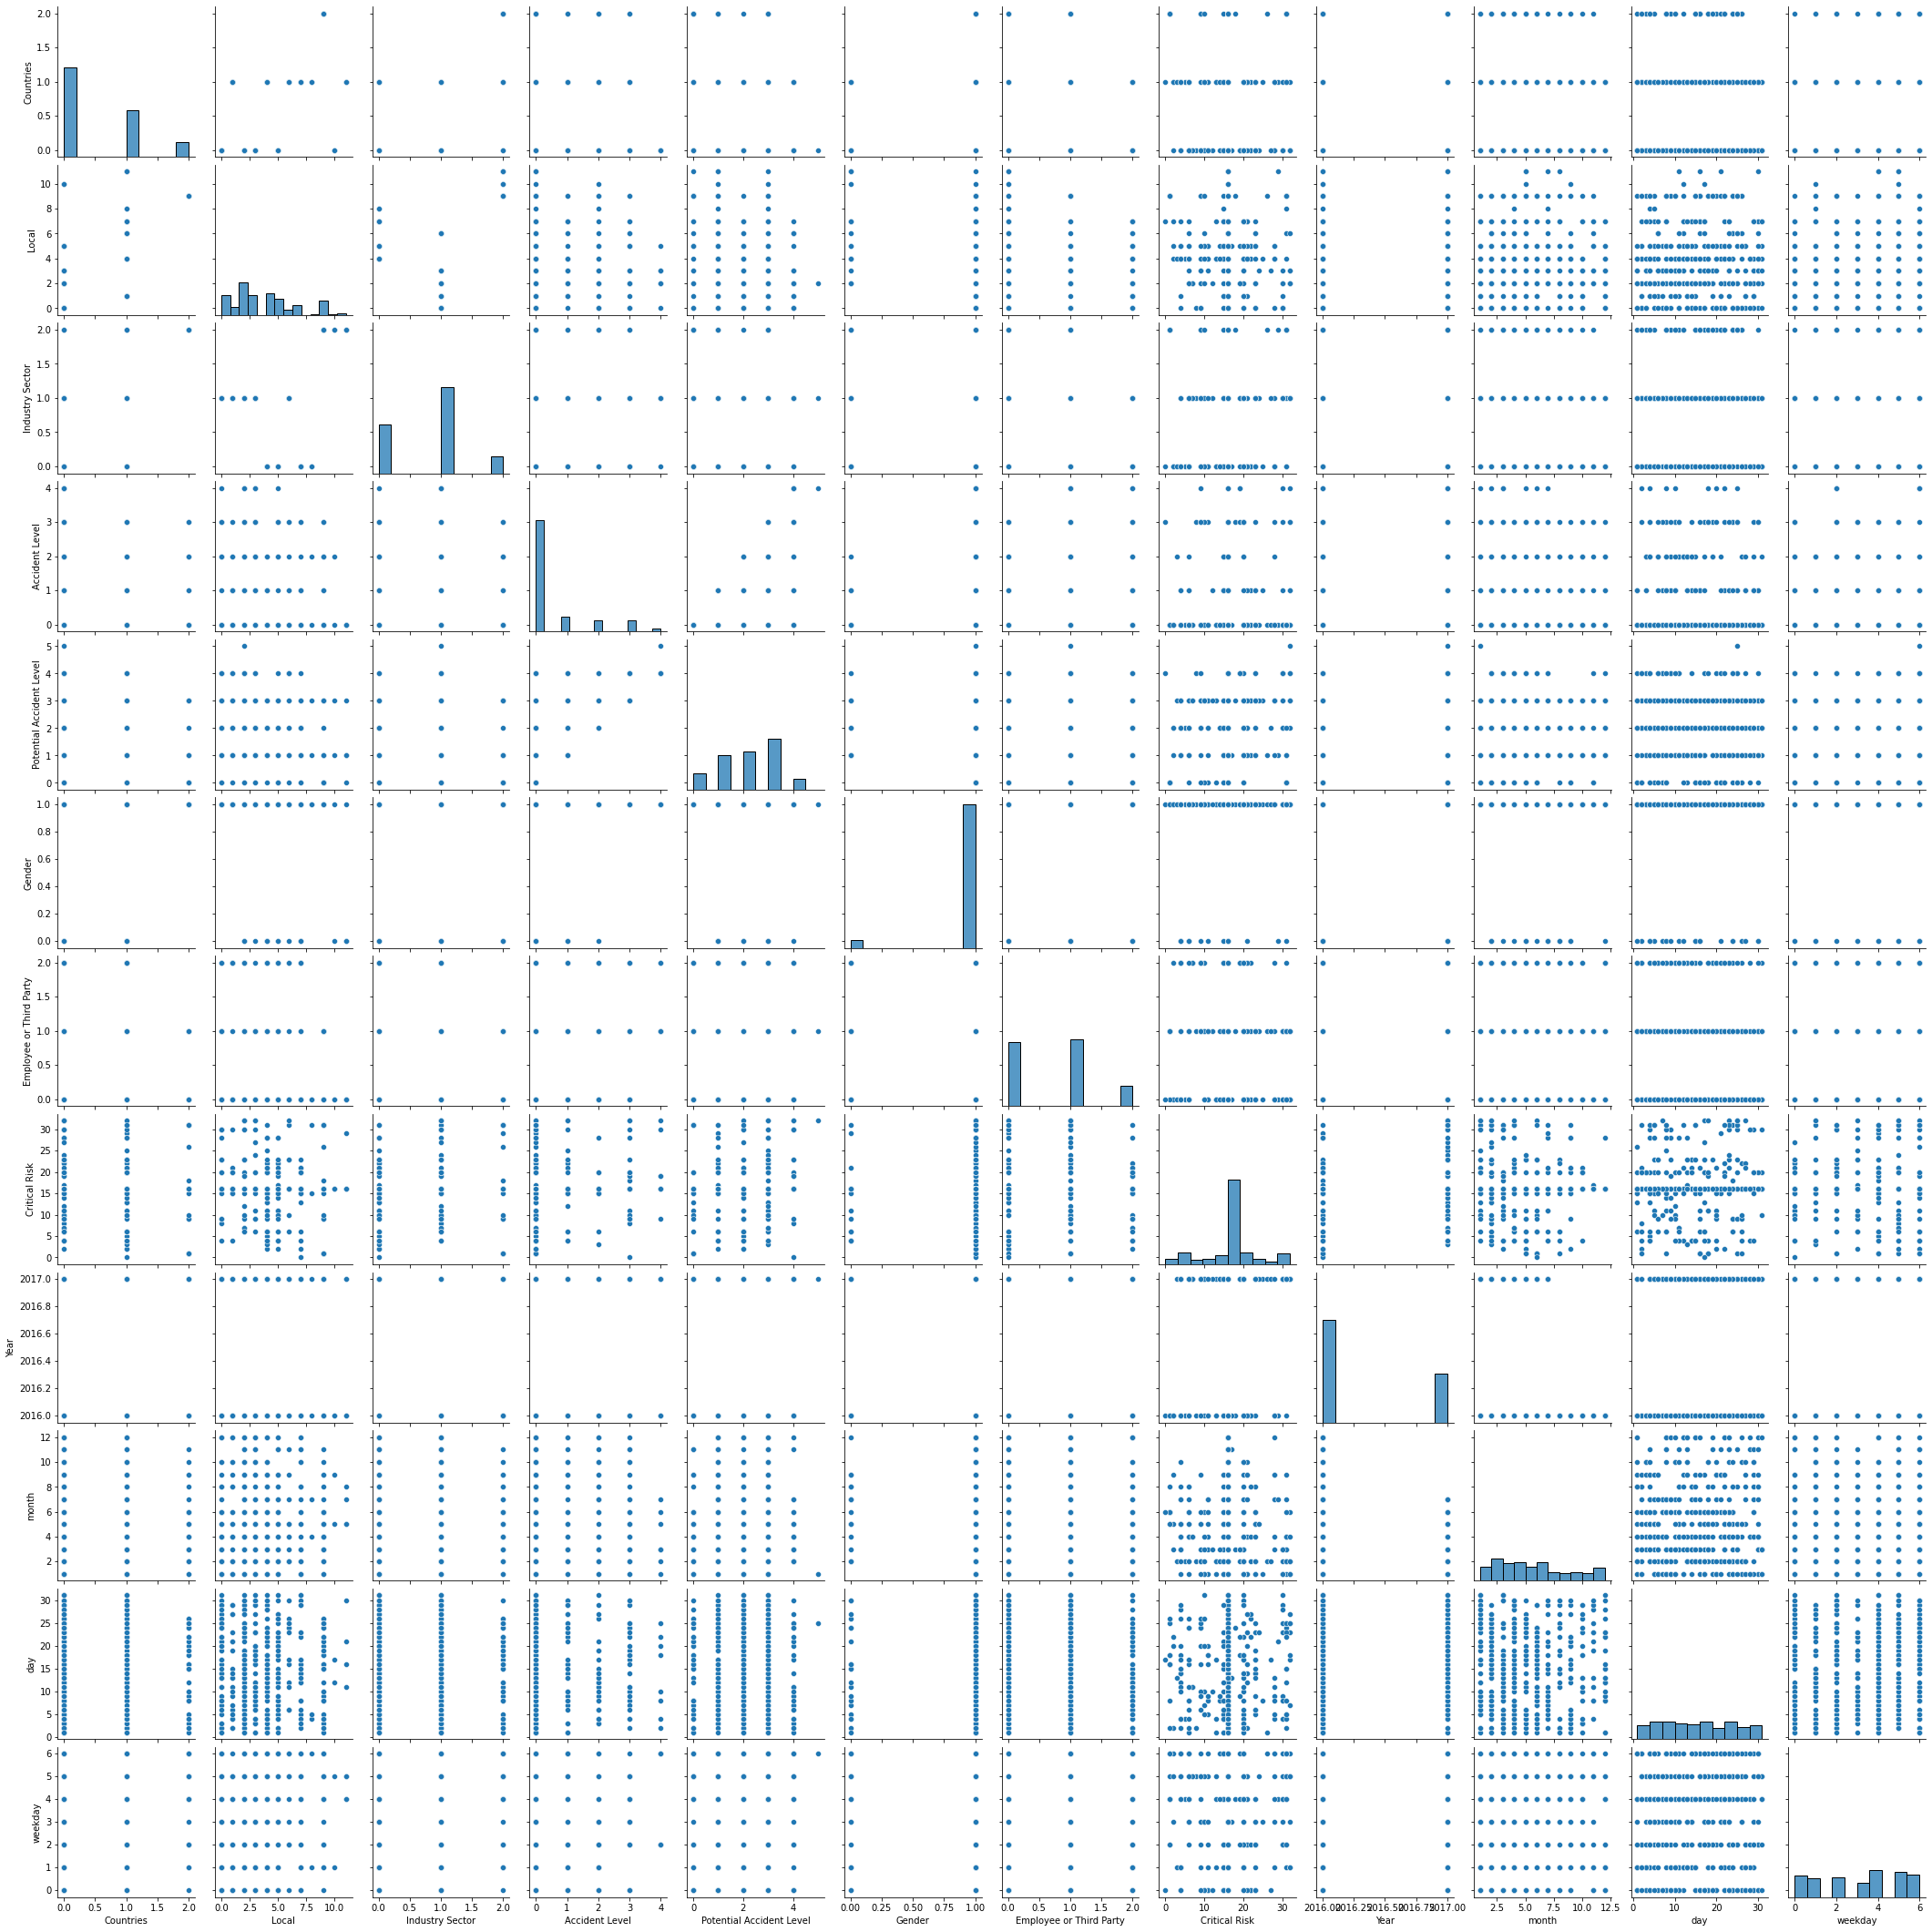

In [127]:
sns.pairplot(data.drop(['Description'],axis=1))

In [128]:
data.to_csv('Data_Preprocessed_file.csv')

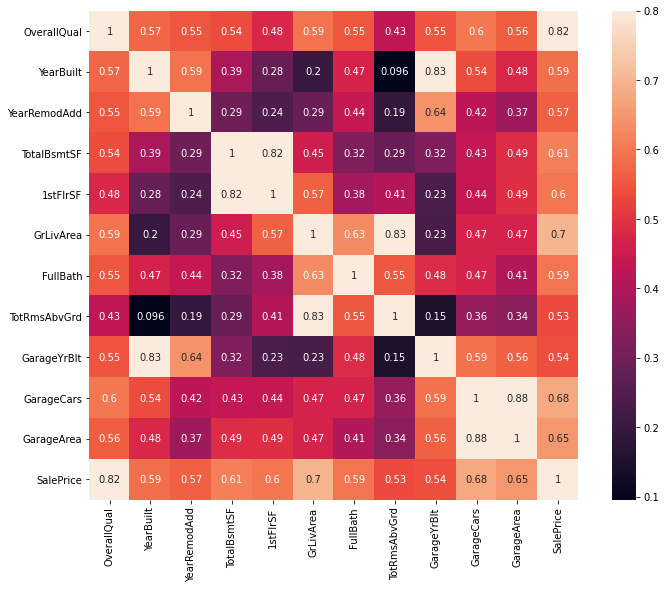

In [12]:
corr=train_Data.corr()
higher_corr_features=corr.index[abs(corr["SalePrice"])>0.5]
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(train_Data[higher_corr_features].corr(),vmax=0.8,square=True, annot=True);

In [13]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

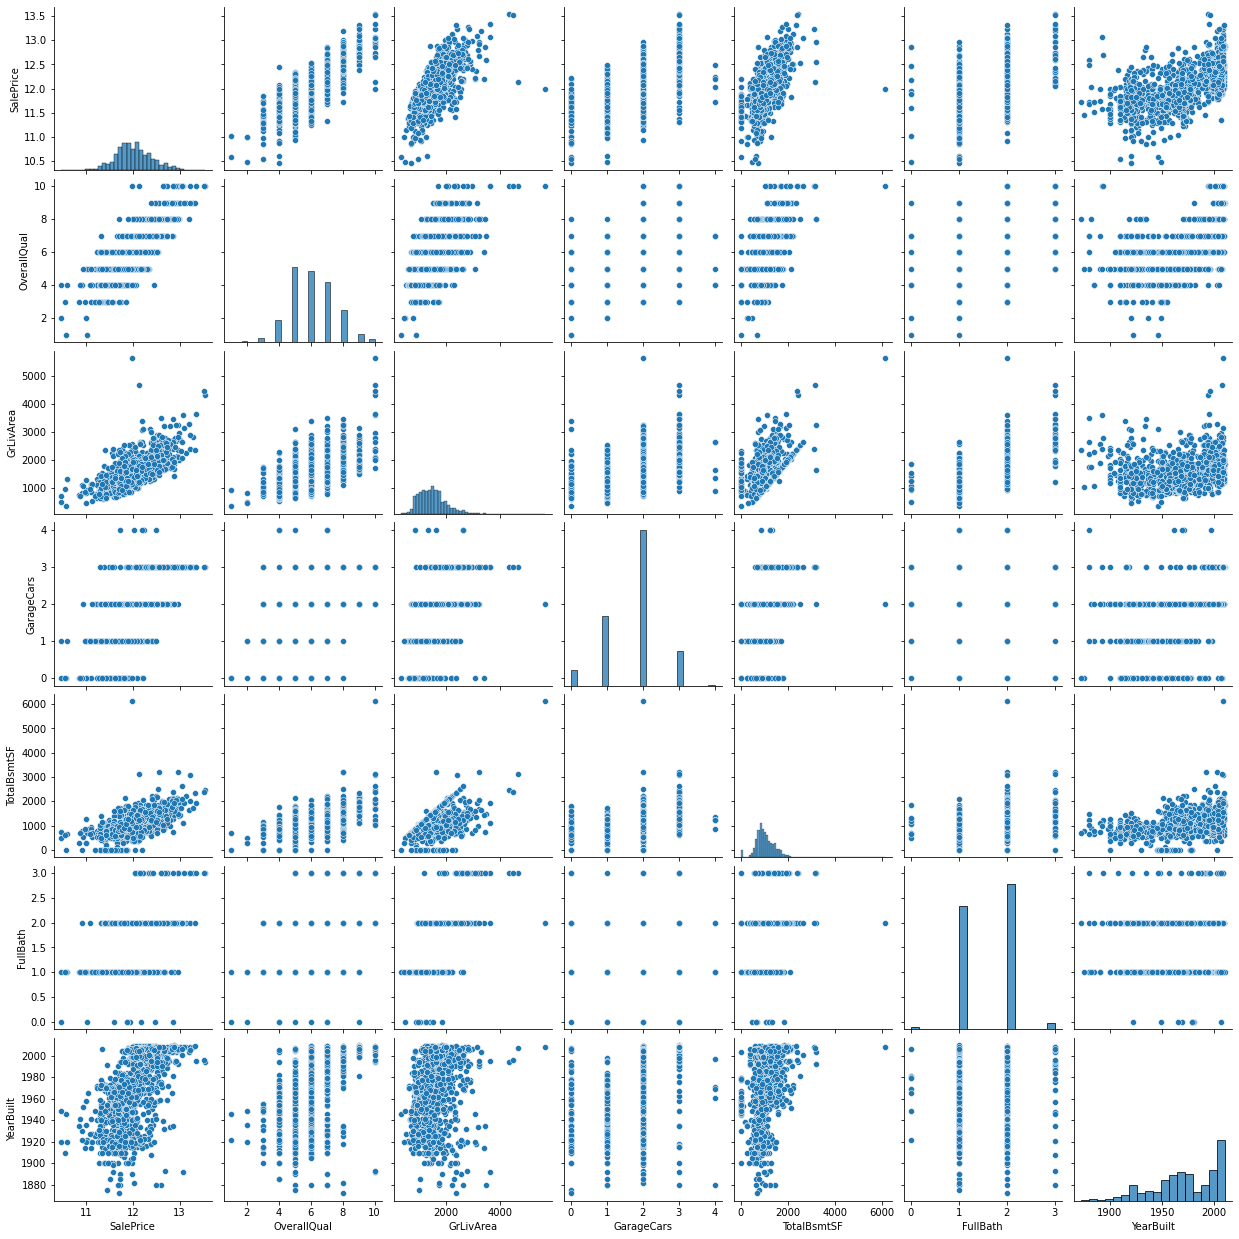

In [14]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(train_Data[cols])

In [15]:
y_train=train_Data['SalePrice']
test_id=test_Data['Id']
all_data=pd.concat([train_Data,test_Data],axis=0,sort=False)
all_data=all_data.drop(['Id','SalePrice'],axis=1)



In [16]:
def missing_Data_analysis(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_Data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    print(missing_Data.head(25))
    return missing_Data

In [17]:
miss_data=missing_Data_analysis(all_data)

              Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageCond      159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageFinish    159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
BsmtFinSF2        1  0.000343
BsmtFinSF1        1  0.000343


In [18]:
all_data.drop((miss_data[miss_data['Total']>5]).index, axis=1,inplace=True)

In [19]:
print(all_data.isnull().sum())

MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 61, dtype: int64


In [20]:
total=all_data.isnull().sum().sort_values(ascending=False)
total.head()

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
Utilities       2
dtype: int64

In [21]:
 #filling the numeric data
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)

In [22]:
#filling categorical data
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])

In [23]:
#Fill in the remaining missing values with the values that are most common for this feature.

all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [24]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [25]:
def fix_skewness(data):
    numeric_features=data.dtypes[data.dtypes !='object'].index
    skewed_features=data[numeric_features].apply(lambda x:skew(x)).sort_values(ascending=False)
    high_skew=skewed_features[abs(skewed_features)>0.5]
    print(high_skew)
    for feature in high_skew.index:
        data[feature] = np.log1p(data[feature])
    return data



In [26]:
all_data=fix_skewness(all_data)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64


In [27]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [28]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [29]:
x_train=all_data[:len(y_train)]
x_test=all_data[len(y_train):]

In [30]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [31]:
import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
the_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
y_predict = np.floor(np.expm1(the_model.predict(x_test)))
y_predict

array([122542., 160902., 183024., ..., 173644., 119746., 220505.],
      dtype=float32)

In [33]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('mysubmission.csv',index=False)

In [35]:
pipe= Pipeline([('classifier', XGBRegressor())])
grid_params=[
#                 {
#                     "classifier":[LinearRegression()],
#                     "classifier__penalty":['l2','l1'],
#                     "classifier__C":np.logspace(0,4,10)
#                 },
#                 {
#                      "classifier":[LogisticRegression()],
#                     "classifier__penalty":['l2'],
#                     "classifier__C":np.logspace(0,4,10),
#                     "classifier__solver":['newton-cg','saga','sag','liblinear']
#                 },
                # {
                #     "classifier":[AdaBoostClassifier()],
                #     "classifier__n_estimators":[10,100,300],
                #     "classifier__learning_rate":[0.05,0.25,0.50,1],
                #     "classifier__algorithm":['SAMME', 'SAMME.R']
#                 # },
                {    "classifier": [XGBRegressor()],
                     "classifier__n_estimators": [10,100],
                     "classifier__max_depth":[3,12]
                    #"classifier__max_features":[18]
                 },
              #  {
                     
              #       "classifier":[GradientBoostingClassifier()],
              #       "classifier__n_estimators": [10, 100, 300],
              #        "classifier__max_depth":[5,8,15],
              #        "classifier__min_samples_leaf":[1,2,5,],
              #        "classifier__max_leaf_nodes": [2, 5,10],
              #       "classifier__learning_rate":[0.05,0.25,0.50,1],
              #       "classifier__criterion": ['friedman_mse', 'mse', 'mae']
                
              #   }
            #  {
            #      "classifier": [BaggingClassifier()],
            #     "classifier__n_estimators": [10, 50, 100,300],
            #     "classifier__max_samples":[0.1,0.5,0.7,1.0]
                 
            #  }
]

gridSearch= GridSearchCV(pipe, grid_params,cv=7,verbose=0,n_jobs=-1)

best_model = gridSearch.fit(x_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(x_train,y_train))

Pipeline(steps=[('classifier',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=3, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])
The mean accuracy of the model is: 0.977673801160787


In [36]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(x_train,y_train))

Pipeline(steps=[('classifier',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=3, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])
The mean accuracy of the model is: 0.977673801160787


In [37]:
y_predict = np.floor(np.expm1(best_model.predict(x_test)))
y_predict
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('mysubmission2.csv',index=False)




In [ ]:
from lightgbm import LGBMRegressor

lgm=LGBMRegressor()
lgm.fit(x_train,y_train)

In [ ]:
y_pred=lgm.predict(x_test)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_pred
sub.to_csv('mysubmission3.csv',index=False)
